image.png

# Entrega # 4 Proyecto final - Aprendizaje automático para la clasificación de tumores de seno



Este notebook corresponde a la primera entrega que consiste en dar solución a el problema de clasificación de tumores de seno utilizando técnicas de aprendizaje profundo

Entregado por: 
   * Nikolas Rodriguez     
   * Angie Zapata 
   * Nicolas Mendez
   * Cristian Cristancho

## Importar librerias 

In [3]:
import seaborn as sns 
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text , DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split ,StratifiedKFold,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Datos/Breast Cancer Prediction.csv',
usecols=['Clump Thickness', 'Marginal Adhesion', 'Bare Nuclei', 'Normal Nucleoli', 'Class'], encoding='latin-1')
df.head()

,Clump Thickness,Marginal Adhesion,Bare Nuclei,Normal Nucleoli,Class
0,5,1,1,1,2
1,5,5,10,2,2
2,3,1,2,1,2
3,6,1,4,7,2
4,4,3,1,1,2


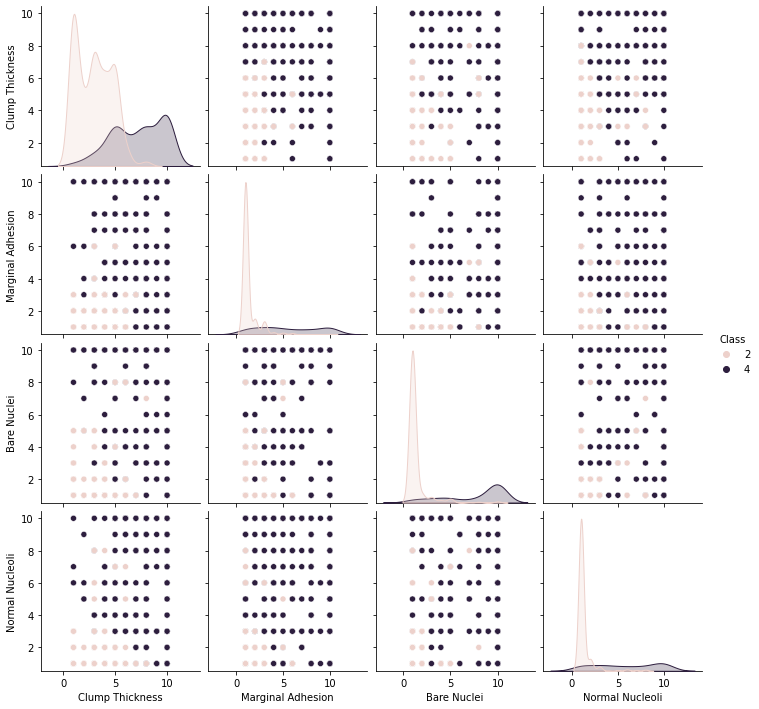

In [5]:
sns.pairplot(data=df, hue = 'Class')
plt.show()

In [6]:
X= pd.DataFrame()
X [['Clump Thickness', 'Marginal Adhesion', 'Bare Nuclei', 'Normal Nucleoli']]= df[['Clump Thickness', 'Marginal Adhesion', 'Bare Nuclei', 'Normal Nucleoli']]

In [7]:
y = pd.DataFrame()
y[['Class']] = df[['Class']]
y = y['Class'].apply(lambda x: 1 if x==4 else 0 )
X_numpy = X.to_numpy()
Y_numpy = y.to_numpy()

In [8]:
X_train,  X_test, y_train, y_test = train_test_split(X_numpy,Y_numpy, train_size=0.7)

In [9]:
print(f'Datos en Train: {X_train.shape[0]}')
print(f'Datos en Test: {X_test.shape[0]}')

Datos en Train: 478
Datos en Test: 205


In [10]:
def get_metricas(y_true, y_pred):

  print(""" 
  Accuracy: """ + str(accuracy_score(y_true, y_pred)) + """
  Precision: """ + str(precision_score(y_true, y_pred,zero_division=0)) + """
  Recall: """ + str(recall_score(y_true, y_pred,zero_division=0)) + """
  """)
  return accuracy_score(y_true, y_pred), precision_score(y_true, y_pred,zero_division=0), recall_score(y_true, y_pred,zero_division=0)

## Creacion de pipelines

Se hará una comparacion con diversos modelos de ML con el mismo dataset

In [11]:
# Uso de Support vector machines

pipe_svm=Pipeline([
              ("scaler",StandardScaler()),
              ("clf", LinearSVC(C=1, loss='hinge',random_state=56))
              ])

pipe_svm_poly=Pipeline([
              ("scaler",StandardScaler()),
              ("clf", SVC(kernel='poly', degree=3,coef0=1,C=5,random_state=56))
              ])

pipe_svm_rbf=Pipeline([
              ("scaler",StandardScaler()),
              ("clf", SVC(kernel='rbf', gamma=5, C=1,random_state=56))
              ])

pipe_svm_rbf_pca=Pipeline([
              ("scaler",StandardScaler()),
              ('pca', PCA(n_components=2)),
              ("clf", SVC(kernel='rbf', gamma=5, C=1,random_state=56))
              ])

In [12]:
# Otros metodos de clasificacion (Arboles de desicion, random forest, Adabost, Kmeans)
pipe_tree= Pipeline([
              ("clf",DecisionTreeClassifier(max_depth=3, random_state=56))
              ])

pipe_forest= Pipeline([
              ("clf",RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1, random_state=56))
              ])

pipe_adabost_forest= Pipeline([
              ("clf",AdaBoostClassifier(RandomForestClassifier(max_depth=1),n_estimators=200,
                                        algorithm='SAMME.R', learning_rate=0.5))
              ])
pipe_kmeans= Pipeline([
              ("clf",KMeans(n_clusters=2))
              ])

In [17]:
# pipes a probar
pipes=[('SVM',pipe_svm),
       ('SVM Poly',pipe_svm_poly),
       ('svm RBF',pipe_svm_rbf),
       ('PCA + svm RBF',pipe_svm_rbf_pca),
       ('dtree',pipe_tree),
       ('RandomForest',pipe_forest),
       ('Adabost',pipe_adabost_forest),
       ('Kmeans',pipe_kmeans),
       ]

In [44]:
#Prueba de todos los modelos 
model_metrics=dict()
for name, pipe in pipes:
  print(name)
  pipe.fit(X_train,y_train)
  y_test_predict = pipe.predict(X_test)
  model_metrics[name]=get_metricas(y_test, y_test_predict)

SVM
 
  Accuracy: 0.975609756097561
  Precision: 0.961038961038961
  Recall: 0.9736842105263158
  
SVM Poly
 
  Accuracy: 0.9707317073170731
  Precision: 0.9605263157894737
  Recall: 0.9605263157894737
  
svm RBF
 
  Accuracy: 0.9658536585365853
  Precision: 0.9156626506024096
  Recall: 1.0
  
PCA + svm RBF
 
  Accuracy: 0.9707317073170731
  Precision: 0.9375
  Recall: 0.9868421052631579
  
dtree
 
  Accuracy: 0.9463414634146341
  Precision: 0.9012345679012346
  Recall: 0.9605263157894737
  
RandomForest
 
  Accuracy: 0.9804878048780488
  Precision: 0.9736842105263158
  Recall: 0.9736842105263158
  
Adabost
 
  Accuracy: 0.9560975609756097
  Precision: 0.9466666666666667
  Recall: 0.9342105263157895
  
Kmeans
 
  Accuracy: 0.9804878048780488
  Precision: 1.0
  Recall: 0.9473684210526315
  


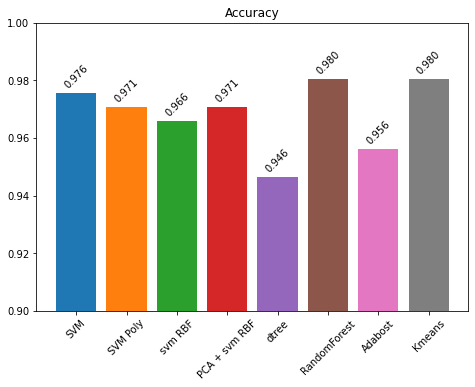

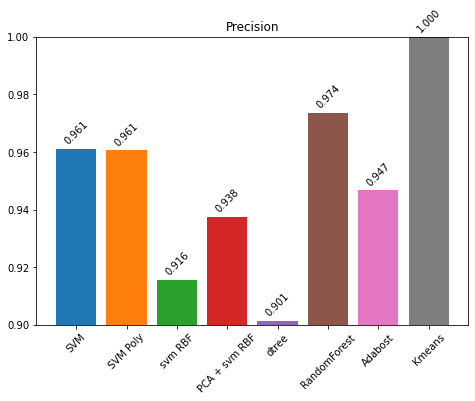

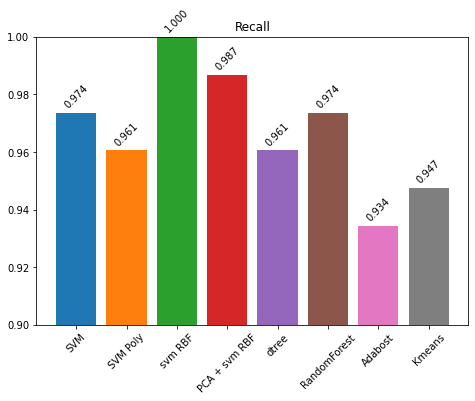

In [49]:
## Comparacion grafica de los modelos 

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=45)

for metric,metric_name in enumerate(['Accuracy','Precision','Recall']):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  for model, j  in model_metrics.items():
    tmp= ax.bar(model,j[metric])
    autolabel(tmp)
  plt.ylim([0.9,1])
  plt.title(metric_name)
  plt.xticks(rotation=45)
  plt.show()

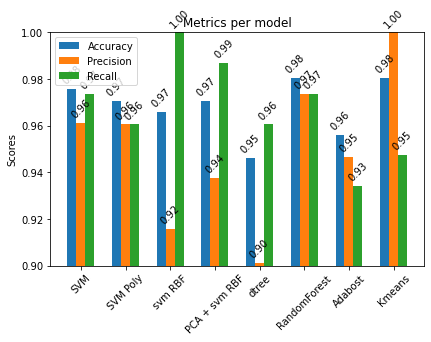

In [46]:
labels = model_metrics.keys()
Accuracy = [ x[0] for x in model_metrics.values()]
Precision = [ x[1] for x in model_metrics.values()]
Recall = [ x[2] for x in model_metrics.values()]


x = np.arange(len(model_metrics.keys()))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, Accuracy, width, label='Accuracy')
rects2 = ax.bar(x , Precision, width, label='Precision')
rects3 = ax.bar(x + width, Recall, width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Metrics per model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{:.2f}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',rotation=45)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.ylim([0.9,1])
plt.xticks(rotation=45)
plt.show()